In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [2]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [3]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [5]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x
        for i in range(y.size):
            for k in range(randint(1,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [6]:
x_n, y_n=make_noise(x,y)

In [7]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [8]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [9]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [10]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [12]:
## Run LR on original features!
orig_lr = LRGD(alpha=10.0, step_size=0.1)
orig_lr.fit(x_te, y_te)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030126  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.910796  avg_L1_norm_grad         0.028347  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         0.846762  avg_L1_norm_grad         0.019586  w[0]    0.001 bias    0.021
iter    3/1000000  loss         0.802430  avg_L1_norm_grad         0.018423  w[0]    0.001 bias    0.025
iter    4/1000000  loss         0.768905  avg_L1_norm_grad         0.014005  w[0]    0.001 bias    0.040
iter    5/1000000  loss         0.743009  avg_L1_norm_grad         0.013412  w[0]    0.001 bias    0.047
iter    6/1000000  loss         0.721829  avg_L1_norm_grad         0.011474  w[0]    0.001 bias    0.059
iter    7/1000000  loss         0.703856  avg_L1_norm_grad         0.010973  w[0]    0.002 bias    0.068
iter    8/1000000  loss         0.6881

iter 3000/1000000  loss         0.181095  avg_L1_norm_grad         0.000206  w[0]    0.016 bias    2.645
iter 3001/1000000  loss         0.181089  avg_L1_norm_grad         0.000206  w[0]    0.016 bias    2.645
iter 3100/1000000  loss         0.180479  avg_L1_norm_grad         0.000201  w[0]    0.017 bias    2.667
iter 3101/1000000  loss         0.180473  avg_L1_norm_grad         0.000201  w[0]    0.017 bias    2.667
iter 3200/1000000  loss         0.179895  avg_L1_norm_grad         0.000196  w[0]    0.017 bias    2.689
iter 3201/1000000  loss         0.179890  avg_L1_norm_grad         0.000196  w[0]    0.017 bias    2.689
iter 3300/1000000  loss         0.179342  avg_L1_norm_grad         0.000192  w[0]    0.017 bias    2.709
iter 3301/1000000  loss         0.179337  avg_L1_norm_grad         0.000192  w[0]    0.017 bias    2.710
iter 3400/1000000  loss         0.178817  avg_L1_norm_grad         0.000187  w[0]    0.017 bias    2.729
iter 3401/1000000  loss         0.178812  avg_L1_norm_g

iter 7000/1000000  loss         0.169343  avg_L1_norm_grad         0.000098  w[0]    0.032 bias    3.161
iter 7001/1000000  loss         0.169341  avg_L1_norm_grad         0.000098  w[0]    0.032 bias    3.162
iter 7100/1000000  loss         0.169215  avg_L1_norm_grad         0.000097  w[0]    0.032 bias    3.169
iter 7101/1000000  loss         0.169214  avg_L1_norm_grad         0.000097  w[0]    0.032 bias    3.169
iter 7200/1000000  loss         0.169091  avg_L1_norm_grad         0.000095  w[0]    0.033 bias    3.176
iter 7201/1000000  loss         0.169089  avg_L1_norm_grad         0.000095  w[0]    0.033 bias    3.176
iter 7300/1000000  loss         0.168970  avg_L1_norm_grad         0.000094  w[0]    0.033 bias    3.183
iter 7301/1000000  loss         0.168969  avg_L1_norm_grad         0.000094  w[0]    0.033 bias    3.183
iter 7400/1000000  loss         0.168853  avg_L1_norm_grad         0.000093  w[0]    0.034 bias    3.190
iter 7401/1000000  loss         0.168852  avg_L1_norm_g

iter 10900/1000000  loss         0.166260  avg_L1_norm_grad         0.000059  w[0]    0.047 bias    3.366
iter 10901/1000000  loss         0.166259  avg_L1_norm_grad         0.000059  w[0]    0.047 bias    3.367
iter 11000/1000000  loss         0.166215  avg_L1_norm_grad         0.000058  w[0]    0.048 bias    3.370
iter 11001/1000000  loss         0.166214  avg_L1_norm_grad         0.000058  w[0]    0.048 bias    3.370
iter 11100/1000000  loss         0.166170  avg_L1_norm_grad         0.000058  w[0]    0.048 bias    3.374
iter 11101/1000000  loss         0.166170  avg_L1_norm_grad         0.000058  w[0]    0.048 bias    3.374
iter 11200/1000000  loss         0.166127  avg_L1_norm_grad         0.000057  w[0]    0.048 bias    3.377
iter 11201/1000000  loss         0.166126  avg_L1_norm_grad         0.000057  w[0]    0.048 bias    3.377
iter 11300/1000000  loss         0.166085  avg_L1_norm_grad         0.000056  w[0]    0.049 bias    3.381
iter 11301/1000000  loss         0.166084  avg

iter 14800/1000000  loss         0.165071  avg_L1_norm_grad         0.000038  w[0]    0.059 bias    3.479
iter 14801/1000000  loss         0.165070  avg_L1_norm_grad         0.000038  w[0]    0.059 bias    3.479
iter 14900/1000000  loss         0.165051  avg_L1_norm_grad         0.000038  w[0]    0.059 bias    3.481
iter 14901/1000000  loss         0.165051  avg_L1_norm_grad         0.000038  w[0]    0.059 bias    3.481
iter 15000/1000000  loss         0.165033  avg_L1_norm_grad         0.000038  w[0]    0.060 bias    3.483
iter 15001/1000000  loss         0.165032  avg_L1_norm_grad         0.000038  w[0]    0.060 bias    3.483
iter 15100/1000000  loss         0.165014  avg_L1_norm_grad         0.000037  w[0]    0.060 bias    3.486
iter 15101/1000000  loss         0.165014  avg_L1_norm_grad         0.000037  w[0]    0.060 bias    3.486
iter 15200/1000000  loss         0.164996  avg_L1_norm_grad         0.000037  w[0]    0.060 bias    3.488
iter 15201/1000000  loss         0.164996  avg

iter 18700/1000000  loss         0.164545  avg_L1_norm_grad         0.000026  w[0]    0.068 bias    3.548
iter 18701/1000000  loss         0.164545  avg_L1_norm_grad         0.000026  w[0]    0.068 bias    3.548
iter 18800/1000000  loss         0.164536  avg_L1_norm_grad         0.000026  w[0]    0.068 bias    3.550
iter 18801/1000000  loss         0.164536  avg_L1_norm_grad         0.000026  w[0]    0.068 bias    3.550
iter 18900/1000000  loss         0.164527  avg_L1_norm_grad         0.000026  w[0]    0.069 bias    3.551
iter 18901/1000000  loss         0.164527  avg_L1_norm_grad         0.000026  w[0]    0.069 bias    3.551
iter 19000/1000000  loss         0.164518  avg_L1_norm_grad         0.000025  w[0]    0.069 bias    3.553
iter 19001/1000000  loss         0.164518  avg_L1_norm_grad         0.000025  w[0]    0.069 bias    3.553
iter 19100/1000000  loss         0.164510  avg_L1_norm_grad         0.000025  w[0]    0.069 bias    3.554
iter 19101/1000000  loss         0.164510  avg

In [13]:
## Run LR on transformed features!
new_lr = LRGDF(alpha=10.0, step_size=0.1)
new_lr.fit(x_te, y_te)

Using Feature Turn_On and Average!
TurnOn Loaded
Ave Loaded
Initializing w_G with 787 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030089  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.910876  avg_L1_norm_grad         0.028369  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         0.846841  avg_L1_norm_grad         0.019586  w[0]    0.001 bias    0.021
iter    3/1000000  loss         0.802489  avg_L1_norm_grad         0.018452  w[0]    0.001 bias    0.025
iter    4/1000000  loss         0.768928  avg_L1_norm_grad         0.013985  w[0]    0.001 bias    0.040
iter    5/1000000  loss         0.743012  avg_L1_norm_grad         0.013410  w[0]    0.001 bias    0.047
iter    6/1000000  loss         0.721819  avg_L1_norm_grad         0.011447  w[0]    0.001 bias    0.059
iter    7/1000000  loss         0.703842  avg_L1_norm_grad         0.010956  w[0]  

iter 3000/1000000  loss         0.180269  avg_L1_norm_grad         0.000207  w[0]    0.017 bias    2.664
iter 3001/1000000  loss         0.180263  avg_L1_norm_grad         0.000207  w[0]    0.017 bias    2.664
iter 3100/1000000  loss         0.179633  avg_L1_norm_grad         0.000202  w[0]    0.017 bias    2.687
iter 3101/1000000  loss         0.179627  avg_L1_norm_grad         0.000202  w[0]    0.017 bias    2.687
iter 3200/1000000  loss         0.179030  avg_L1_norm_grad         0.000197  w[0]    0.017 bias    2.709
iter 3201/1000000  loss         0.179024  avg_L1_norm_grad         0.000197  w[0]    0.017 bias    2.710
iter 3300/1000000  loss         0.178456  avg_L1_norm_grad         0.000192  w[0]    0.018 bias    2.731
iter 3301/1000000  loss         0.178451  avg_L1_norm_grad         0.000192  w[0]    0.018 bias    2.731
iter 3400/1000000  loss         0.177911  avg_L1_norm_grad         0.000188  w[0]    0.018 bias    2.752
iter 3401/1000000  loss         0.177906  avg_L1_norm_g

iter 7000/1000000  loss         0.167832  avg_L1_norm_grad         0.000099  w[0]    0.033 bias    3.214
iter 7001/1000000  loss         0.167830  avg_L1_norm_grad         0.000099  w[0]    0.033 bias    3.214
iter 7100/1000000  loss         0.167689  avg_L1_norm_grad         0.000097  w[0]    0.034 bias    3.222
iter 7101/1000000  loss         0.167688  avg_L1_norm_grad         0.000097  w[0]    0.034 bias    3.222
iter 7200/1000000  loss         0.167550  avg_L1_norm_grad         0.000096  w[0]    0.034 bias    3.230
iter 7201/1000000  loss         0.167549  avg_L1_norm_grad         0.000096  w[0]    0.034 bias    3.230
iter 7300/1000000  loss         0.167415  avg_L1_norm_grad         0.000095  w[0]    0.034 bias    3.238
iter 7301/1000000  loss         0.167414  avg_L1_norm_grad         0.000095  w[0]    0.034 bias    3.238
iter 7400/1000000  loss         0.167284  avg_L1_norm_grad         0.000093  w[0]    0.035 bias    3.245
iter 7401/1000000  loss         0.167283  avg_L1_norm_g

iter 10900/1000000  loss         0.164237  avg_L1_norm_grad         0.000059  w[0]    0.049 bias    3.450
iter 10901/1000000  loss         0.164236  avg_L1_norm_grad         0.000059  w[0]    0.049 bias    3.450
iter 11000/1000000  loss         0.164180  avg_L1_norm_grad         0.000059  w[0]    0.050 bias    3.455
iter 11001/1000000  loss         0.164179  avg_L1_norm_grad         0.000059  w[0]    0.050 bias    3.455
iter 11100/1000000  loss         0.164124  avg_L1_norm_grad         0.000058  w[0]    0.050 bias    3.459
iter 11101/1000000  loss         0.164123  avg_L1_norm_grad         0.000058  w[0]    0.050 bias    3.459
iter 11200/1000000  loss         0.164069  avg_L1_norm_grad         0.000057  w[0]    0.050 bias    3.463
iter 11201/1000000  loss         0.164068  avg_L1_norm_grad         0.000057  w[0]    0.050 bias    3.463
iter 11300/1000000  loss         0.164015  avg_L1_norm_grad         0.000057  w[0]    0.051 bias    3.468
iter 11301/1000000  loss         0.164015  avg

iter 14800/1000000  loss         0.162634  avg_L1_norm_grad         0.000039  w[0]    0.062 bias    3.592
iter 14801/1000000  loss         0.162634  avg_L1_norm_grad         0.000039  w[0]    0.062 bias    3.592
iter 14900/1000000  loss         0.162605  avg_L1_norm_grad         0.000038  w[0]    0.062 bias    3.594
iter 14901/1000000  loss         0.162605  avg_L1_norm_grad         0.000038  w[0]    0.062 bias    3.595
iter 15000/1000000  loss         0.162577  avg_L1_norm_grad         0.000038  w[0]    0.063 bias    3.597
iter 15001/1000000  loss         0.162577  avg_L1_norm_grad         0.000038  w[0]    0.063 bias    3.597
iter 15100/1000000  loss         0.162549  avg_L1_norm_grad         0.000038  w[0]    0.063 bias    3.600
iter 15101/1000000  loss         0.162549  avg_L1_norm_grad         0.000038  w[0]    0.063 bias    3.600
iter 15200/1000000  loss         0.162521  avg_L1_norm_grad         0.000037  w[0]    0.063 bias    3.603
iter 15201/1000000  loss         0.162521  avg

iter 18700/1000000  loss         0.161768  avg_L1_norm_grad         0.000027  w[0]    0.072 bias    3.688
iter 18701/1000000  loss         0.161768  avg_L1_norm_grad         0.000027  w[0]    0.072 bias    3.688
iter 18800/1000000  loss         0.161751  avg_L1_norm_grad         0.000026  w[0]    0.072 bias    3.690
iter 18801/1000000  loss         0.161751  avg_L1_norm_grad         0.000026  w[0]    0.072 bias    3.690
iter 18900/1000000  loss         0.161735  avg_L1_norm_grad         0.000026  w[0]    0.072 bias    3.692
iter 18901/1000000  loss         0.161734  avg_L1_norm_grad         0.000026  w[0]    0.072 bias    3.692
iter 19000/1000000  loss         0.161718  avg_L1_norm_grad         0.000026  w[0]    0.073 bias    3.694
iter 19001/1000000  loss         0.161718  avg_L1_norm_grad         0.000026  w[0]    0.073 bias    3.694
iter 19100/1000000  loss         0.161702  avg_L1_norm_grad         0.000026  w[0]    0.073 bias    3.696
iter 19101/1000000  loss         0.161702  avg

iter 22600/1000000  loss         0.161236  avg_L1_norm_grad         0.000019  w[0]    0.079 bias    3.757
iter 22601/1000000  loss         0.161236  avg_L1_norm_grad         0.000019  w[0]    0.079 bias    3.757
iter 22700/1000000  loss         0.161225  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.759
iter 22701/1000000  loss         0.161225  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.759
iter 22800/1000000  loss         0.161214  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.760
iter 22801/1000000  loss         0.161214  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.760
iter 22900/1000000  loss         0.161203  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.762
iter 22901/1000000  loss         0.161203  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.762
iter 23000/1000000  loss         0.161193  avg_L1_norm_grad         0.000018  w[0]    0.080 bias    3.763
iter 23001/1000000  loss         0.161192  avg

iter 26500/1000000  loss         0.160876  avg_L1_norm_grad         0.000013  w[0]    0.085 bias    3.810
iter 26501/1000000  loss         0.160876  avg_L1_norm_grad         0.000013  w[0]    0.085 bias    3.810
iter 26600/1000000  loss         0.160869  avg_L1_norm_grad         0.000013  w[0]    0.085 bias    3.811
iter 26601/1000000  loss         0.160868  avg_L1_norm_grad         0.000013  w[0]    0.085 bias    3.811
iter 26700/1000000  loss         0.160861  avg_L1_norm_grad         0.000013  w[0]    0.085 bias    3.813
iter 26701/1000000  loss         0.160861  avg_L1_norm_grad         0.000013  w[0]    0.085 bias    3.813
iter 26800/1000000  loss         0.160853  avg_L1_norm_grad         0.000013  w[0]    0.086 bias    3.814
iter 26801/1000000  loss         0.160853  avg_L1_norm_grad         0.000013  w[0]    0.086 bias    3.814
iter 26900/1000000  loss         0.160846  avg_L1_norm_grad         0.000013  w[0]    0.086 bias    3.815
iter 26901/1000000  loss         0.160846  avg

iter 30400/1000000  loss         0.160616  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.852
iter 30401/1000000  loss         0.160616  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.852
iter 30500/1000000  loss         0.160611  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.853
iter 30501/1000000  loss         0.160611  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.853
iter 30600/1000000  loss         0.160605  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.854
iter 30601/1000000  loss         0.160605  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.854
iter 30700/1000000  loss         0.160599  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.855
iter 30701/1000000  loss         0.160599  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.855
iter 30800/1000000  loss         0.160594  avg_L1_norm_grad         0.000010  w[0]    0.090 bias    3.856
iter 30801/1000000  loss         0.160594  avg

iter 34300/1000000  loss         0.160419  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.885
iter 34301/1000000  loss         0.160419  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.885
iter 34400/1000000  loss         0.160415  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.886
iter 34401/1000000  loss         0.160415  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.886
iter 34500/1000000  loss         0.160411  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.887
iter 34501/1000000  loss         0.160411  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.887
iter 34600/1000000  loss         0.160406  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.888
iter 34601/1000000  loss         0.160406  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.888
iter 34700/1000000  loss         0.160402  avg_L1_norm_grad         0.000007  w[0]    0.093 bias    3.888
iter 34701/1000000  loss         0.160402  avg

iter 38200/1000000  loss         0.160265  avg_L1_norm_grad         0.000006  w[0]    0.096 bias    3.913
iter 38201/1000000  loss         0.160265  avg_L1_norm_grad         0.000006  w[0]    0.096 bias    3.913
iter 38300/1000000  loss         0.160262  avg_L1_norm_grad         0.000006  w[0]    0.096 bias    3.914
iter 38301/1000000  loss         0.160262  avg_L1_norm_grad         0.000006  w[0]    0.096 bias    3.914
iter 38400/1000000  loss         0.160258  avg_L1_norm_grad         0.000005  w[0]    0.096 bias    3.914
iter 38401/1000000  loss         0.160258  avg_L1_norm_grad         0.000005  w[0]    0.096 bias    3.914
iter 38500/1000000  loss         0.160255  avg_L1_norm_grad         0.000005  w[0]    0.096 bias    3.915
iter 38501/1000000  loss         0.160255  avg_L1_norm_grad         0.000005  w[0]    0.096 bias    3.915
iter 38600/1000000  loss         0.160251  avg_L1_norm_grad         0.000005  w[0]    0.096 bias    3.916
iter 38601/1000000  loss         0.160251  avg

iter 42100/1000000  loss         0.160142  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.936
iter 42101/1000000  loss         0.160141  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.936
iter 42200/1000000  loss         0.160139  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.937
iter 42201/1000000  loss         0.160139  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.937
iter 42300/1000000  loss         0.160136  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.937
iter 42301/1000000  loss         0.160136  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.937
iter 42400/1000000  loss         0.160133  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.938
iter 42401/1000000  loss         0.160133  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.938
iter 42500/1000000  loss         0.160130  avg_L1_norm_grad         0.000004  w[0]    0.098 bias    3.938
iter 42501/1000000  loss         0.160130  avg

iter 46000/1000000  loss         0.160041  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.956
iter 46001/1000000  loss         0.160041  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.956
iter 46100/1000000  loss         0.160039  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.956
iter 46101/1000000  loss         0.160039  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.956
iter 46200/1000000  loss         0.160036  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.957
iter 46201/1000000  loss         0.160036  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.957
iter 46300/1000000  loss         0.160034  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.957
iter 46301/1000000  loss         0.160034  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.957
iter 46400/1000000  loss         0.160032  avg_L1_norm_grad         0.000003  w[0]    0.100 bias    3.958
iter 46401/1000000  loss         0.160032  avg

iter 49900/1000000  loss         0.159959  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.973
iter 49901/1000000  loss         0.159959  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.973
iter 50000/1000000  loss         0.159957  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.973
iter 50001/1000000  loss         0.159957  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.973
iter 50100/1000000  loss         0.159955  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.974
iter 50101/1000000  loss         0.159955  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.974
iter 50200/1000000  loss         0.159953  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.974
iter 50201/1000000  loss         0.159953  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.974
iter 50300/1000000  loss         0.159951  avg_L1_norm_grad         0.000003  w[0]    0.101 bias    3.974
iter 50301/1000000  loss         0.159951  avg

iter 53800/1000000  loss         0.159891  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.988
iter 53801/1000000  loss         0.159890  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.988
iter 53900/1000000  loss         0.159889  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.988
iter 53901/1000000  loss         0.159889  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.988
iter 54000/1000000  loss         0.159887  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.988
iter 54001/1000000  loss         0.159887  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.988
iter 54100/1000000  loss         0.159886  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.989
iter 54101/1000000  loss         0.159886  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.989
iter 54200/1000000  loss         0.159884  avg_L1_norm_grad         0.000002  w[0]    0.102 bias    3.989
iter 54201/1000000  loss         0.159884  avg

iter 57700/1000000  loss         0.159834  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.001
iter 57701/1000000  loss         0.159834  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.001
iter 57800/1000000  loss         0.159833  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.001
iter 57801/1000000  loss         0.159833  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.001
iter 57900/1000000  loss         0.159831  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.001
iter 57901/1000000  loss         0.159831  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.001
iter 58000/1000000  loss         0.159830  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.002
iter 58001/1000000  loss         0.159830  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.002
iter 58100/1000000  loss         0.159829  avg_L1_norm_grad         0.000002  w[0]    0.103 bias    4.002
iter 58101/1000000  loss         0.159829  avg

iter 61600/1000000  loss         0.159787  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.012
iter 61601/1000000  loss         0.159787  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.012
iter 61700/1000000  loss         0.159786  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.013
iter 61701/1000000  loss         0.159786  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.013
iter 61800/1000000  loss         0.159785  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.013
iter 61801/1000000  loss         0.159785  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.013
iter 61900/1000000  loss         0.159784  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.013
iter 61901/1000000  loss         0.159784  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.013
iter 62000/1000000  loss         0.159783  avg_L1_norm_grad         0.000002  w[0]    0.104 bias    4.014
iter 62001/1000000  loss         0.159783  avg

iter 65500/1000000  loss         0.159748  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.023
iter 65501/1000000  loss         0.159748  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.023
iter 65600/1000000  loss         0.159747  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.023
iter 65601/1000000  loss         0.159747  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.023
iter 65700/1000000  loss         0.159746  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.023
iter 65701/1000000  loss         0.159746  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.023
iter 65800/1000000  loss         0.159745  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.024
iter 65801/1000000  loss         0.159745  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.024
iter 65900/1000000  loss         0.159744  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.024
iter 65901/1000000  loss         0.159744  avg

iter 69400/1000000  loss         0.159715  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.032
iter 69401/1000000  loss         0.159715  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.032
iter 69500/1000000  loss         0.159715  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.032
iter 69501/1000000  loss         0.159715  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.032
iter 69600/1000000  loss         0.159714  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.033
iter 69601/1000000  loss         0.159714  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.033
iter 69700/1000000  loss         0.159713  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.033
iter 69701/1000000  loss         0.159713  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.033
iter 69800/1000000  loss         0.159712  avg_L1_norm_grad         0.000001  w[0]    0.105 bias    4.033
iter 69801/1000000  loss         0.159712  avg

iter 73300/1000000  loss         0.159688  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.040
iter 73301/1000000  loss         0.159688  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.040
iter 73400/1000000  loss         0.159687  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73401/1000000  loss         0.159687  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73500/1000000  loss         0.159687  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73501/1000000  loss         0.159687  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73600/1000000  loss         0.159686  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73601/1000000  loss         0.159686  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73700/1000000  loss         0.159686  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.041
iter 73701/1000000  loss         0.159686  avg

iter 77200/1000000  loss         0.159665  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.048
iter 77201/1000000  loss         0.159665  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.048
iter 77300/1000000  loss         0.159665  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.048
iter 77301/1000000  loss         0.159665  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.048
iter 77400/1000000  loss         0.159664  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.048
iter 77401/1000000  loss         0.159664  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.048
iter 77500/1000000  loss         0.159664  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.049
iter 77501/1000000  loss         0.159664  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.049
iter 77600/1000000  loss         0.159663  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.049
iter 77601/1000000  loss         0.159663  avg

iter 81100/1000000  loss         0.159646  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81101/1000000  loss         0.159646  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81200/1000000  loss         0.159646  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81201/1000000  loss         0.159646  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81300/1000000  loss         0.159645  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81301/1000000  loss         0.159645  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81400/1000000  loss         0.159645  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81401/1000000  loss         0.159645  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.055
iter 81500/1000000  loss         0.159645  avg_L1_norm_grad         0.000001  w[0]    0.106 bias    4.056
iter 81501/1000000  loss         0.159645  avg

iter 85000/1000000  loss         0.159630  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.061
iter 85001/1000000  loss         0.159630  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.061
iter 85100/1000000  loss         0.159630  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.061
iter 85101/1000000  loss         0.159630  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.061
iter 85200/1000000  loss         0.159630  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.061
iter 85201/1000000  loss         0.159630  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.061
iter 85300/1000000  loss         0.159629  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.062
iter 85301/1000000  loss         0.159629  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.062
iter 85400/1000000  loss         0.159629  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.062
iter 85401/1000000  loss         0.159629  avg

iter 88900/1000000  loss         0.159617  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 88901/1000000  loss         0.159617  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89000/1000000  loss         0.159617  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89001/1000000  loss         0.159617  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89100/1000000  loss         0.159617  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89101/1000000  loss         0.159617  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89200/1000000  loss         0.159616  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89201/1000000  loss         0.159616  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89300/1000000  loss         0.159616  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.067
iter 89301/1000000  loss         0.159616  avg

iter 92800/1000000  loss         0.159606  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 92801/1000000  loss         0.159606  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 92900/1000000  loss         0.159606  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 92901/1000000  loss         0.159606  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 93000/1000000  loss         0.159606  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 93001/1000000  loss         0.159606  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 93100/1000000  loss         0.159605  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 93101/1000000  loss         0.159605  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 93200/1000000  loss         0.159605  avg_L1_norm_grad         0.000001  w[0]    0.107 bias    4.072
iter 93201/1000000  loss         0.159605  avg

iter 96700/1000000  loss         0.159597  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 96701/1000000  loss         0.159597  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 96800/1000000  loss         0.159597  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 96801/1000000  loss         0.159597  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 96900/1000000  loss         0.159596  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 96901/1000000  loss         0.159596  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 97000/1000000  loss         0.159596  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 97001/1000000  loss         0.159596  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 97100/1000000  loss         0.159596  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.077
iter 97101/1000000  loss         0.159596  avg

iter 100600/1000000  loss         0.159589  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100601/1000000  loss         0.159589  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100700/1000000  loss         0.159589  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100701/1000000  loss         0.159589  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100800/1000000  loss         0.159589  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100801/1000000  loss         0.159589  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100900/1000000  loss         0.159588  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 100901/1000000  loss         0.159588  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 101000/1000000  loss         0.159588  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.081
iter 101001/1000000  loss         0.1

iter 104500/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104501/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104600/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104601/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104700/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104701/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104800/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104801/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104900/1000000  loss         0.159582  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.085
iter 104901/1000000  loss         0.1

iter 108400/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.088
iter 108401/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.088
iter 108500/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108501/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108600/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108601/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108700/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108701/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108800/1000000  loss         0.159577  avg_L1_norm_grad         0.000001  w[0]    0.108 bias    4.089
iter 108801/1000000  loss         0.1

iter 112300/1000000  loss         0.159573  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112301/1000000  loss         0.159573  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112400/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112401/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112500/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112501/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112600/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112601/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112700/1000000  loss         0.159572  avg_L1_norm_grad         0.000000  w[0]    0.108 bias    4.092
iter 112701/1000000  loss         0.1

In [11]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

Using Feature Turn_On and Average!
TurnOn Loaded
Ave Loaded
Initializing w_G with 787 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.028528  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.918064  avg_L1_norm_grad         0.029994  w[0]    0.000 bias    0.000
iter    2/1000000  loss         0.856437  avg_L1_norm_grad         0.020531  w[0]    0.001 bias    0.019
iter    3/1000000  loss         0.811329  avg_L1_norm_grad         0.021532  w[0]    0.002 bias    0.022
iter    4/1000000  loss         0.775614  avg_L1_norm_grad         0.015158  w[0]    0.003 bias    0.037
iter    5/1000000  loss         0.747649  avg_L1_norm_grad         0.015655  w[0]    0.003 bias    0.041
iter    6/1000000  loss         0.724615  avg_L1_norm_grad         0.012310  w[0]    0.004 bias    0.053
iter    7/1000000  loss         0.705275  avg_L1_norm_grad         0.012378  w[0]  

iter 3000/1000000  loss         0.216036  avg_L1_norm_grad         0.000127  w[0]    0.163 bias    1.566
iter 3001/1000000  loss         0.216034  avg_L1_norm_grad         0.000127  w[0]    0.163 bias    1.566
iter 3100/1000000  loss         0.215826  avg_L1_norm_grad         0.000121  w[0]    0.163 bias    1.576
iter 3101/1000000  loss         0.215824  avg_L1_norm_grad         0.000121  w[0]    0.163 bias    1.576
iter 3200/1000000  loss         0.215635  avg_L1_norm_grad         0.000116  w[0]    0.164 bias    1.585
iter 3201/1000000  loss         0.215633  avg_L1_norm_grad         0.000116  w[0]    0.164 bias    1.585
iter 3300/1000000  loss         0.215459  avg_L1_norm_grad         0.000111  w[0]    0.165 bias    1.594
iter 3301/1000000  loss         0.215457  avg_L1_norm_grad         0.000111  w[0]    0.165 bias    1.594
iter 3400/1000000  loss         0.215298  avg_L1_norm_grad         0.000106  w[0]    0.165 bias    1.602
iter 3401/1000000  loss         0.215296  avg_L1_norm_g

iter 7000/1000000  loss         0.213442  avg_L1_norm_grad         0.000027  w[0]    0.174 bias    1.771
iter 7001/1000000  loss         0.213442  avg_L1_norm_grad         0.000027  w[0]    0.174 bias    1.771
iter 7100/1000000  loss         0.213431  avg_L1_norm_grad         0.000026  w[0]    0.174 bias    1.774
iter 7101/1000000  loss         0.213431  avg_L1_norm_grad         0.000026  w[0]    0.174 bias    1.774
iter 7200/1000000  loss         0.213421  avg_L1_norm_grad         0.000025  w[0]    0.174 bias    1.776
iter 7201/1000000  loss         0.213421  avg_L1_norm_grad         0.000025  w[0]    0.174 bias    1.776
iter 7300/1000000  loss         0.213411  avg_L1_norm_grad         0.000024  w[0]    0.174 bias    1.778
iter 7301/1000000  loss         0.213411  avg_L1_norm_grad         0.000024  w[0]    0.174 bias    1.778
iter 7400/1000000  loss         0.213402  avg_L1_norm_grad         0.000023  w[0]    0.174 bias    1.780
iter 7401/1000000  loss         0.213402  avg_L1_norm_g

iter 10900/1000000  loss         0.213275  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.827
iter 10901/1000000  loss         0.213274  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.827
iter 11000/1000000  loss         0.213273  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.827
iter 11001/1000000  loss         0.213273  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.827
iter 11100/1000000  loss         0.213272  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.828
iter 11101/1000000  loss         0.213272  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.828
iter 11200/1000000  loss         0.213271  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.829
iter 11201/1000000  loss         0.213271  avg_L1_norm_grad         0.000007  w[0]    0.175 bias    1.829
iter 11300/1000000  loss         0.213270  avg_L1_norm_grad         0.000006  w[0]    0.175 bias    1.830
iter 11301/1000000  loss         0.213270  avg

iter 14800/1000000  loss         0.213255  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 14801/1000000  loss         0.213255  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 14900/1000000  loss         0.213254  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 14901/1000000  loss         0.213254  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 15000/1000000  loss         0.213254  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 15001/1000000  loss         0.213254  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 15100/1000000  loss         0.213254  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
iter 15101/1000000  loss         0.213254  avg_L1_norm_grad         0.000002  w[0]    0.175 bias    1.845
Done. Converged after 15155 iterations.
Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step

iter 2600/1000000  loss         0.217861  avg_L1_norm_grad         0.000153  w[0]    0.159 bias    1.514
iter 2601/1000000  loss         0.217858  avg_L1_norm_grad         0.000153  w[0]    0.159 bias    1.514
iter 2700/1000000  loss         0.217568  avg_L1_norm_grad         0.000145  w[0]    0.160 bias    1.525
iter 2701/1000000  loss         0.217565  avg_L1_norm_grad         0.000145  w[0]    0.160 bias    1.525
iter 2800/1000000  loss         0.217301  avg_L1_norm_grad         0.000139  w[0]    0.161 bias    1.535
iter 2801/1000000  loss         0.217299  avg_L1_norm_grad         0.000139  w[0]    0.161 bias    1.535
iter 2900/1000000  loss         0.217059  avg_L1_norm_grad         0.000132  w[0]    0.162 bias    1.545
iter 2901/1000000  loss         0.217057  avg_L1_norm_grad         0.000132  w[0]    0.162 bias    1.545
iter 3000/1000000  loss         0.216839  avg_L1_norm_grad         0.000126  w[0]    0.162 bias    1.555
iter 3001/1000000  loss         0.216837  avg_L1_norm_g

iter 6600/1000000  loss         0.214464  avg_L1_norm_grad         0.000030  w[0]    0.173 bias    1.740
iter 6601/1000000  loss         0.214464  avg_L1_norm_grad         0.000030  w[0]    0.173 bias    1.740
iter 6700/1000000  loss         0.214452  avg_L1_norm_grad         0.000029  w[0]    0.173 bias    1.742
iter 6701/1000000  loss         0.214452  avg_L1_norm_grad         0.000029  w[0]    0.173 bias    1.742
iter 6800/1000000  loss         0.214441  avg_L1_norm_grad         0.000028  w[0]    0.173 bias    1.745
iter 6801/1000000  loss         0.214441  avg_L1_norm_grad         0.000028  w[0]    0.173 bias    1.745
iter 6900/1000000  loss         0.214431  avg_L1_norm_grad         0.000027  w[0]    0.173 bias    1.747
iter 6901/1000000  loss         0.214431  avg_L1_norm_grad         0.000027  w[0]    0.173 bias    1.747
iter 7000/1000000  loss         0.214421  avg_L1_norm_grad         0.000026  w[0]    0.173 bias    1.749
iter 7001/1000000  loss         0.214421  avg_L1_norm_g

In [15]:
y_hat_Origin=np.asarray(orig_lr.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

y_hat_New=np.asarray(new_lr.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

Origin Accuracy 0.9558611111111084
TurnOn Loaded
Ave Loaded
New Accuracy 0.9578055555555528
No Noise Ori 0.9336111111110852
TurnOn Loaded
Ave Loaded
No Noise New 0.9338888888888629


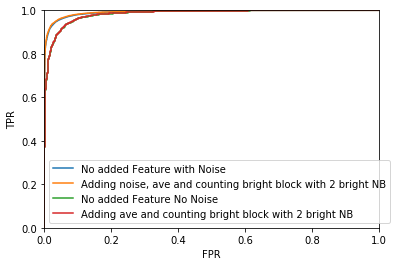

In [18]:
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
plt.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
plt.plot(fpr3te,tpr3te, label="Adding noise, ave and counting bright block with 2 bright NB")

fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
plt.plot(fpr1Tte,tpr1Tte, label="No added Feature No Noise")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
plt.plot(fprTte,tprTte, label="Adding ave and counting bright block with 2 bright NB")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

In [21]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

TurnOn Loaded
Ave Loaded


MXV0
Error Rate: 0.045 0.993339